In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 

In [14]:
img = cv2.imread("/Users/buketcalp/Downloads/goruntu3.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### Görselin Histogramını çizdirme 

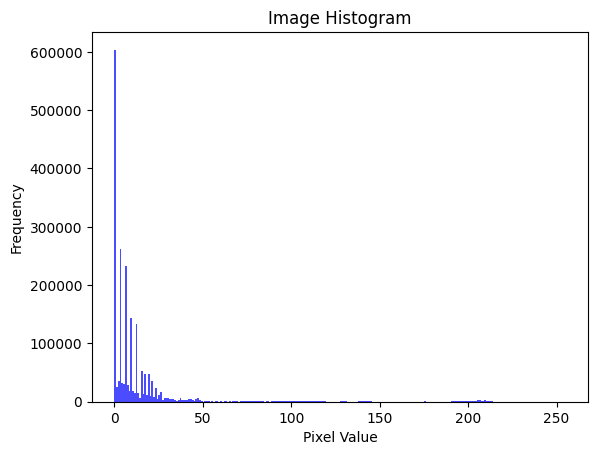

In [15]:
histogram = cv2.calcHist([img_gray], [0], None, [256], [0, 256])


plt.figure()
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.hist(np.arange(256), bins=256, weights=histogram, color='blue', alpha=0.7)
plt.show()


### Eşitleme uygulamanmış görsel 

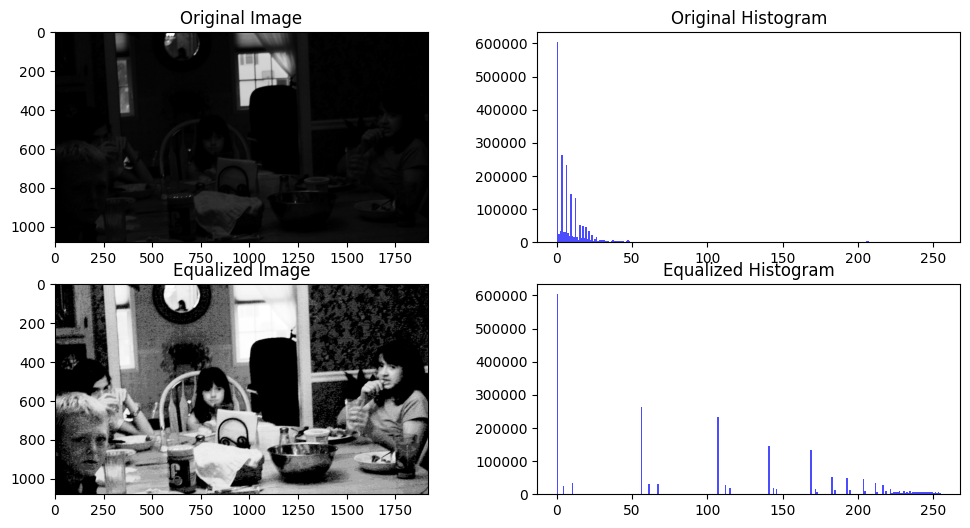

In [16]:
img_equalized = cv2.equalizeHist(img_gray)
histogram_original = cv2.calcHist([img_gray], [0], None, [256], [0, 256])
histogram_equalized = cv2.calcHist([img_equalized], [0], None, [256], [0, 256])


plt.figure(figsize=(12, 6))

plt.subplot(221), plt.imshow(img_gray, cmap='gray'), plt.title('Original Image')
plt.subplot(222), plt.hist(np.arange(256), bins=256, weights=histogram_original,
                           color='blue', alpha=0.7)
plt.title('Original Histogram')


plt.subplot(223), plt.imshow(img_equalized, cmap='gray'), plt.title('Equalized Image')
plt.subplot(224), plt.hist(np.arange(256), bins=256, weights=histogram_equalized, 
                           color='blue', alpha=0.7)
plt.title('Equalized Histogram')
plt.show()

### Görüntüye bicubic interpolasyon ile iki kat büyütme

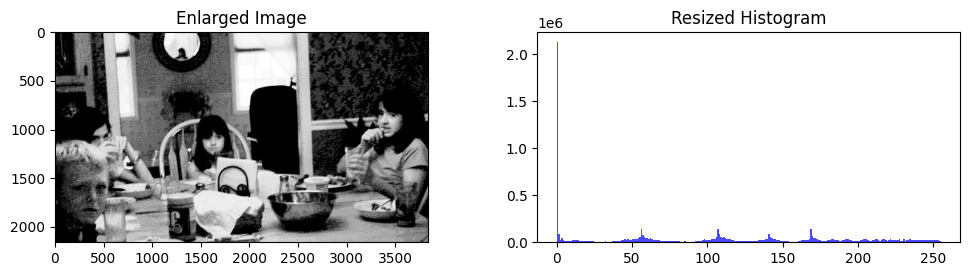

In [39]:
height, width = img_equalized.shape
img_enlarged = cv2.resize(img_equalized, (2*width, 2*height), interpolation=cv2.INTER_CUBIC)
histogram_enlarged = cv2.calcHist([img_enlarged], [0], None, [256], [0, 256])


plt.figure(figsize=(12, 6))

plt.subplot(221), plt.imshow(img_enlarged, cmap='gray'), plt.title('Enlarged Image')
plt.subplot(222), plt.hist(np.arange(256), bins=256, weights=histogram_enlarged, color='blue'
                           , alpha=0.7)
plt.title('Resized Histogram')
plt.show()

###	Görüntüye unsharp masking ve highboost filtering uygulama

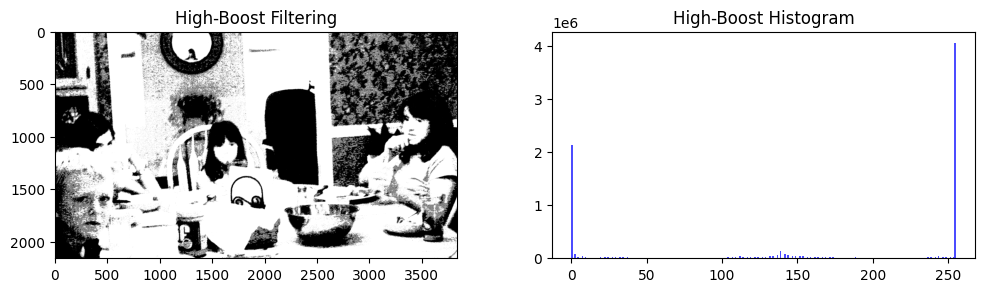

In [42]:
blurred = cv2.GaussianBlur(img_enlarged, (5, 5), 2)
unsharp_mask = cv2.addWeighted(img_enlarged, 1.5, blurred, 0, -1)
highboost_filter = cv2.addWeighted(img_enlarged, 2.5, unsharp_mask, 0, -1)


plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 5), plt.imshow(highboost_filter, cmap='gray'), plt.title('High-Boost Filtering')
plt.subplot(3, 2, 6), plt.hist(np.arange(256),
                               bins=256,
                               weights=cv2.calcHist([highboost_filter], [0], None, [256], [0, 256])
                               , color='blue', alpha=0.7)
plt.title('High-Boost Histogram')
plt.show()

### Dft2 yi shift etme

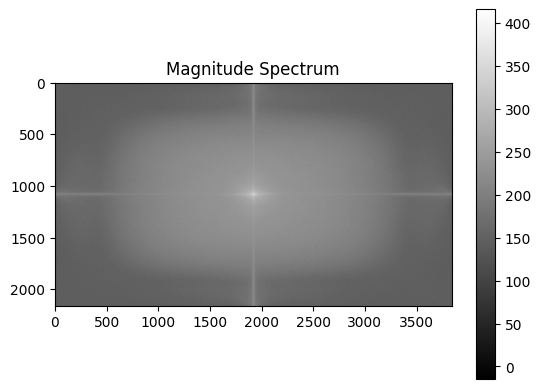

In [19]:
dft = cv2.dft(np.float32(highboost_filter), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1]))


plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.colorbar()
plt.show()

### Gauss filtresini çizdirme 

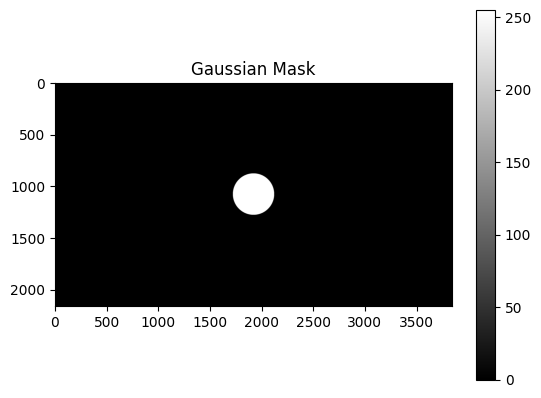

In [20]:
radius = 200
rows, cols = highboost_filter.shape
crow, ccol = rows // 2, cols // 2
x, y = np.ogrid[:rows, :cols]
mask = (x - crow)**2 + (y - ccol)**2 <= radius**2

img_clear_circle = np.zeros_like(highboost_filter)
img_clear_circle[mask] = 255  

black_background = np.zeros_like(highboost_filter)
black_background[crow - radius:crow + radius, ccol - radius:ccol + radius] = 
img_clear_circle[crow - radius:crow + radius, ccol - radius:ccol + radius] #görselde sığması adına
#aşağı indirdim.
plt.imshow(black_background, cmap='gray')
plt.title('Gaussian Mask')
plt.colorbar()
plt.show()

### Görüntünün ters dft2 sini alıp görüntünün son halini çizdirme

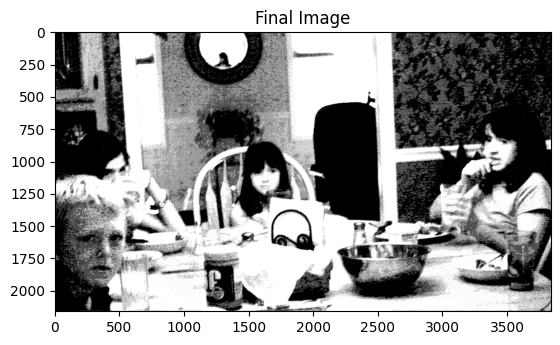

In [21]:
inverse_dft = cv2.idft(dft_shifted)
img_final = cv2.magnitude(inverse_dft[:, :, 1], inverse_dft[:, :, 0])
img_final = np.flipud(np.fliplr(img_final))

plt.imshow(img_final, cmap='gray')
plt.title('Final Image')
plt.show()


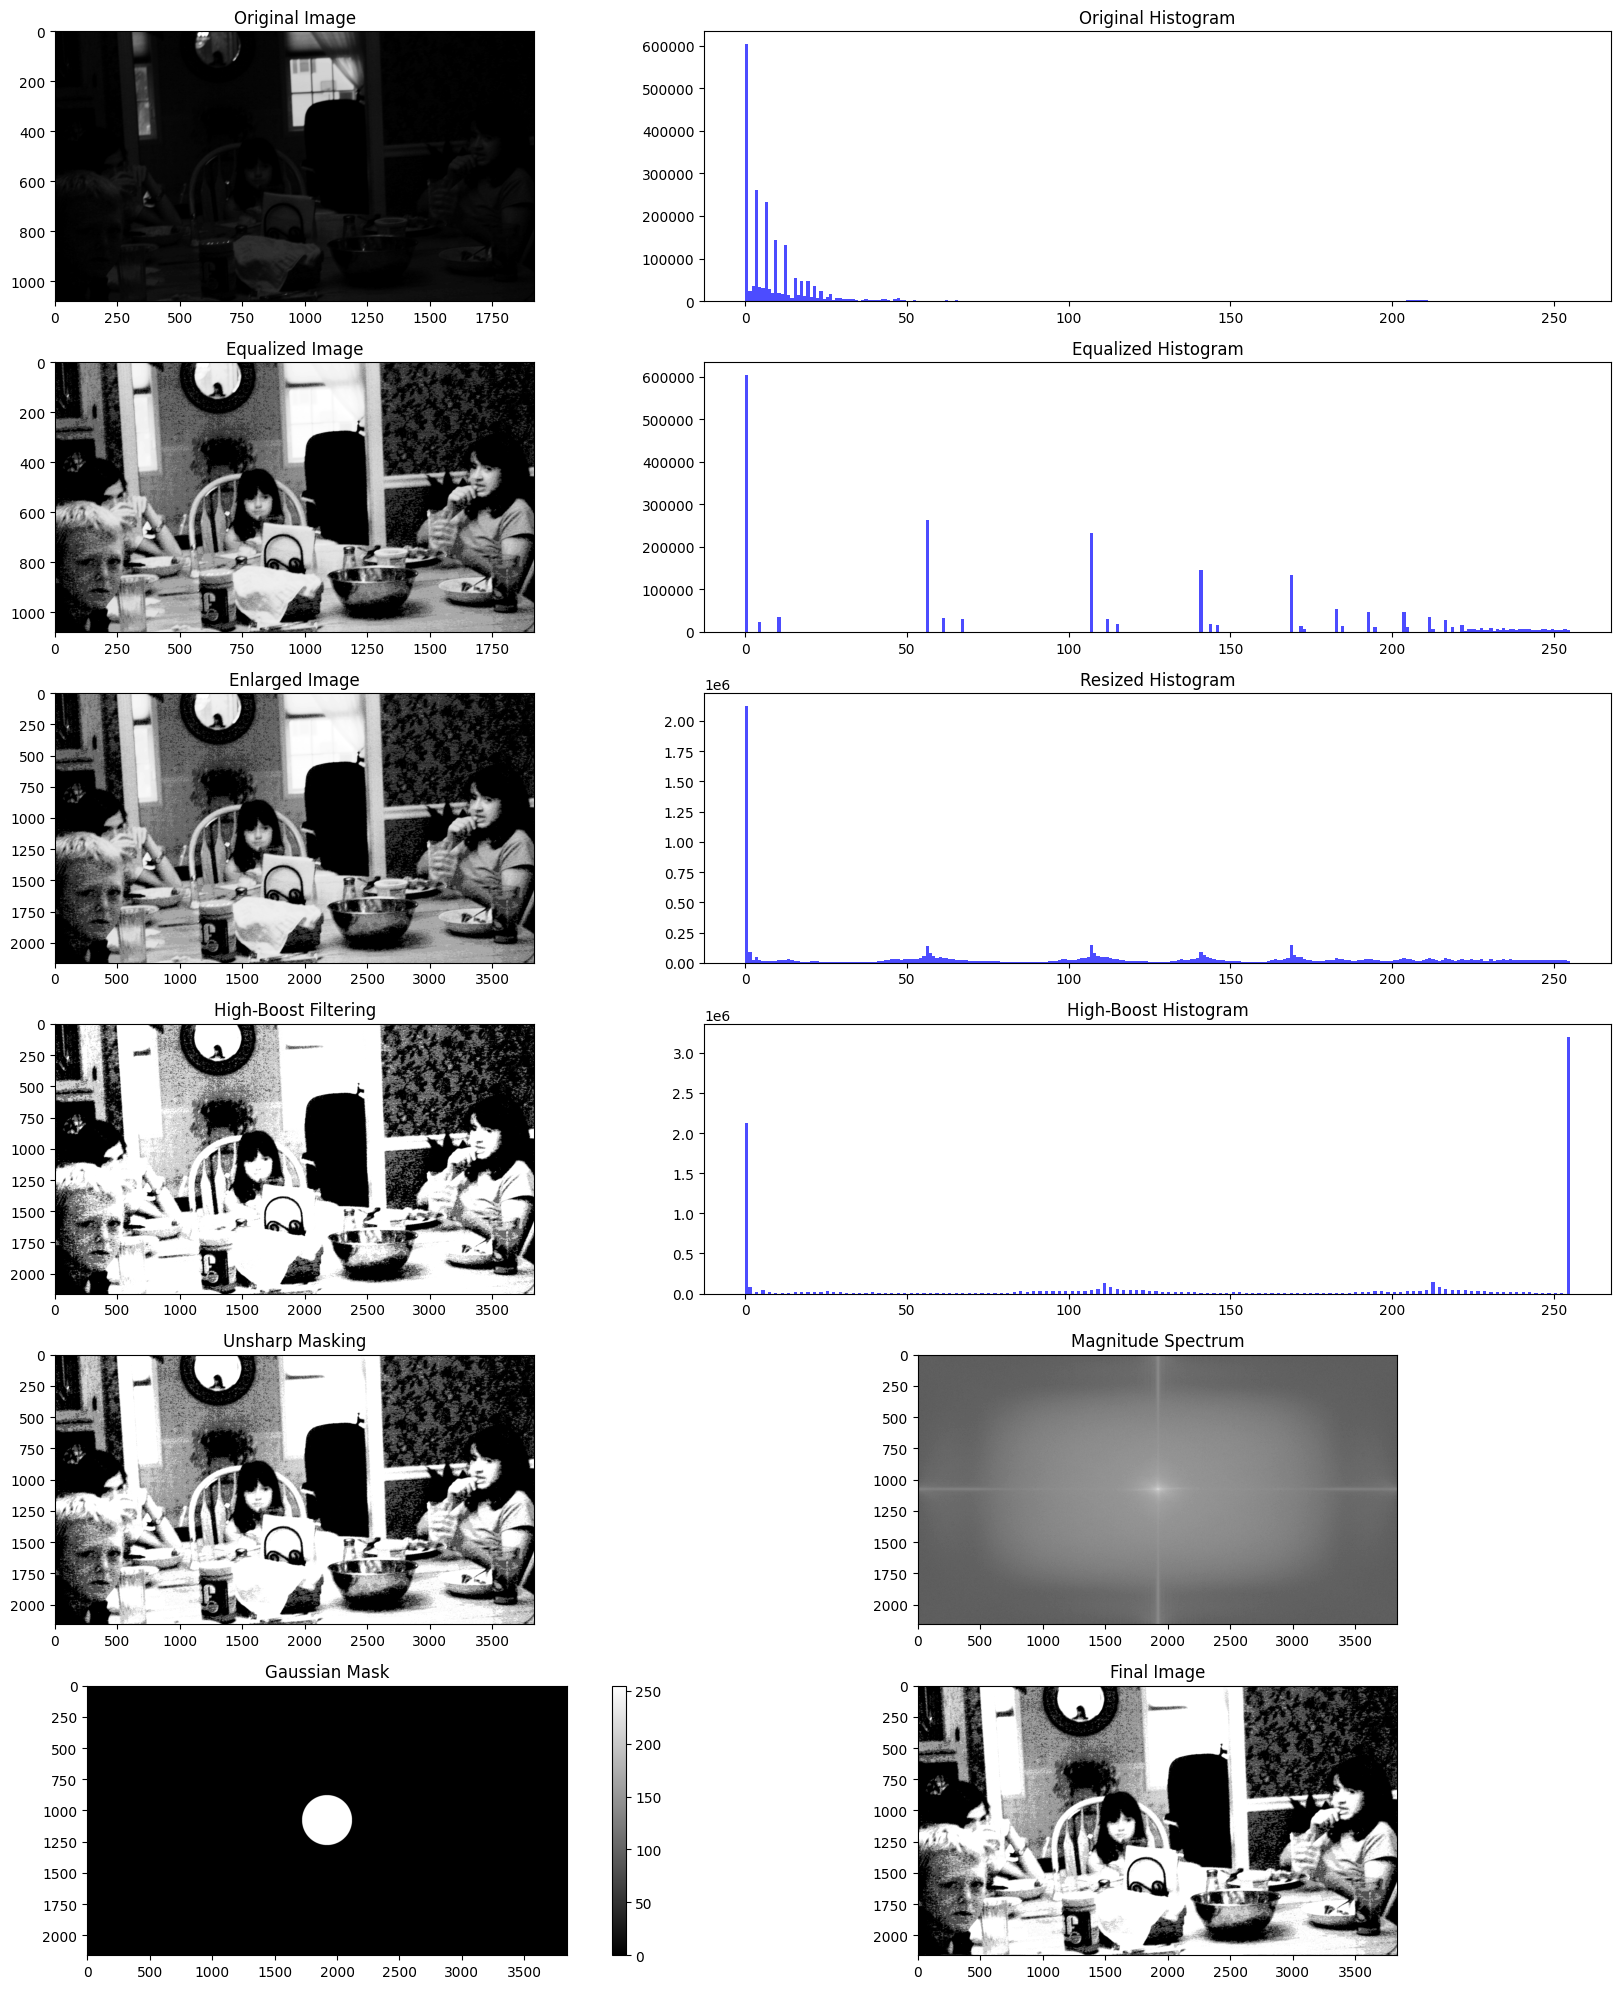

In [32]:
plt.figure(figsize=(18, 20))


plt.subplot(6, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(6, 2, 2)
plt.hist(np.arange(256), bins=256, weights=histogram_original, color='blue', alpha=0.7)
plt.title('Original Histogram')


plt.subplot(6, 2, 3)
plt.imshow(img_equalized, cmap='gray')
plt.title('Equalized Image')

plt.subplot(6, 2, 4)
plt.hist(np.arange(256), bins=256, weights=histogram_equalized, color='blue', alpha=0.7)
plt.title('Equalized Histogram')


plt.subplot(6, 2, 5)
plt.imshow(img_enlarged, cmap='gray')
plt.title('Enlarged Image')

plt.subplot(6, 2, 6)
plt.hist(np.arange(256), bins=256, weights=histogram_enlarged, color='blue', alpha=0.7)
plt.title('Resized Histogram')


plt.subplot(6, 2, 8)
plt.hist(np.arange(256), bins=256, weights=cv2.calcHist([highboost_filter], [0], None, [256], [0, 256]), color='blue', alpha=0.7)
plt.title('High-Boost Histogram')

plt.subplot(6, 2, 7)
plt.imshow(highboost_filter, cmap='gray')
plt.title('High-Boost Filtering')


plt.subplot(6, 2, 10)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')


plt.subplot(6, 2, 11)
plt.imshow(black_background, cmap='gray')
plt.title('Gaussian Mask')
plt.colorbar()


plt.subplot(6, 2, 12)
plt.imshow(img_final, cmap='gray')
plt.title('Final Image')


plt.subplot(6, 2, 9)
plt.imshow(unsharp_mask, cmap='gray')
plt.title('Unsharp Masking')

plt.tight_layout()
plt.show()
